In [1]:
raw_data <- read.csv("SSL_RAT_RACE_CODE_30_40.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))

The Number of Rows in Initial Data is 60659

In [2]:
final_features<-raw_data[,c('SSL_SCORE','SSL_SCORE_RANK','PREDICTOR_RAT_AGE_AT_LATEST_ARREST','PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
                            'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT','PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES','PREDICTOR_RAT_GANG_AFFILIATION', 
                           'PREDICTOR_RAT_NARCOTIC_ARRESTS','PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY','PREDICTOR_RAT_UUW_ARRESTS','RACE_CODE_CD')]

In [3]:
complete_data <- final_features[complete.cases(final_features),]
nrow(complete_data)

[1] 60659

In [4]:
head(complete_data)

SSL_SCORE,SSL_SCORE_RANK,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,RACE_CODE_CD
478,296,30-40,1,6,1,1,0,-0.6,1,0
471,363,30-40,0,0,0,1,22,-1.8,0,0
456,579,30-40,2,0,0,1,16,2.4,0,0
456,579,30-40,2,2,0,1,6,1.5,0,0
447,749,30-40,1,2,2,1,6,-2.6,0,0
444,827,30-40,1,1,3,1,0,0.5,3,0


In [5]:
library(MatchIt)
library(dplyr)
library(ggplot2)

Warning message:
"package 'MatchIt' was built under R version 3.3.3"Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [6]:
#SSL_SCORE
complete_data %>%
  group_by(RACE_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE = mean(SSL_SCORE),
            STD_ERROR = sd(SSL_SCORE) / sqrt(NUMBER_OF_PEOPLE))

RACE_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE,STD_ERROR
0,42071,270.0234,0.08805065
1,18588,266.9068,0.10824328


In [7]:
# For SSL_SCORE_RANK
complete_data %>%
  group_by(RACE_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE_RANK = mean(SSL_SCORE_RANK),
            STD_ERROR = sd(SSL_SCORE_RANK) / sqrt(NUMBER_OF_PEOPLE))

RACE_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE_RANK,STD_ERROR
0,42071,242721.1,203.2993
1,18588,250290.1,233.8118


In [8]:
# T-test without PSM for SSL_SCORE and RACE_CODE_CD
attach(complete_data)
t.test(SSL_SCORE~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE by RACE_CODE_CD
t = 22.336, df = 43004, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2.843181 3.390157
sample estimates:
mean in group 0 mean in group 1 
       270.0234        266.9068 


In [9]:
# T-test without PSM for SSL_SCORE_RANK and RACE_CODE_CD
t.test(SSL_SCORE_RANK~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_RANK by RACE_CODE_CD
t = -24.429, df = 45760, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8176.235 -6961.667
sample estimates:
mean in group 0 mean in group 1 
       242721.1        250290.1 


In [10]:
mod_match <- matchit(RACE_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS,
                     method = "nearest", data = complete_data)

In [11]:
mod_match


Call: 
matchit(formula = RACE_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + 
    PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + 
    PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + 
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + PREDICTOR_RAT_UUW_ARRESTS, 
    data = complete_data, method = "nearest")

Sample sizes:
          Control Treated
All         42071   18588
Matched     18588   18588
Unmatched   23483       0
Discarded       0       0


In [12]:
matched <- match.data(mod_match)
matched_copy<-matched

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

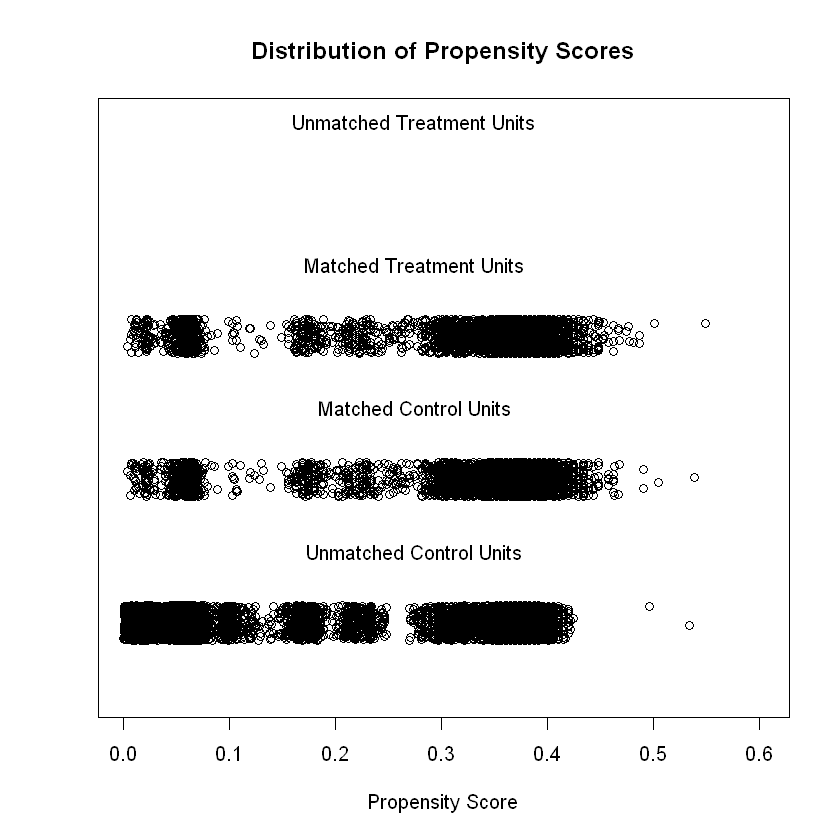

In [13]:
plot(mod_match, type = "jitter")

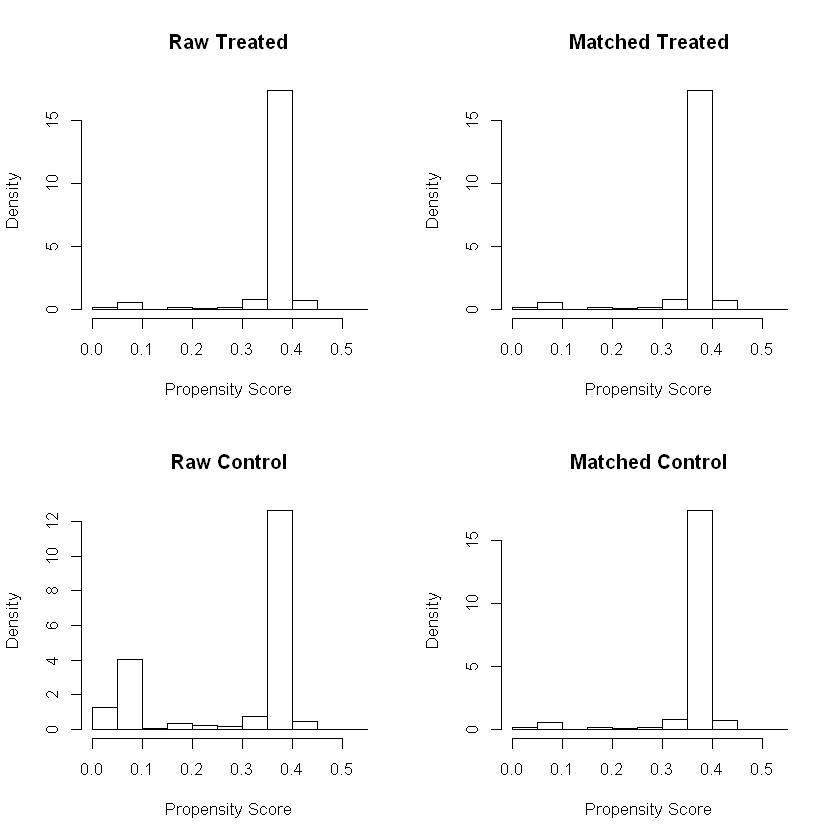

In [14]:
plot(mod_match, type = "hist")

In [15]:
head(matched)

,SSL_SCORE,SSL_SCORE_RANK,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,RACE_CODE_CD,distance,weights
22,390,4974,30-40,0,0,0,0,2,0.5,0,0,0.392990926,1
27,384,6146,30-40,0,0,0,0,1,0.1,0,0,0.378760428,1
34,378,7693,30-40,0,0,0,0,0,0.6,0,0,0.405591645,1
44,371,10087,30-40,0,0,0,0,2,-0.6,0,1,0.343942819,1
46,369,10962,30-40,0,0,0,0,1,-0.3,0,1,0.360880229,1
57,365,13017,30-40,0,0,2,1,1,0.7,2,1,0.008532888,1


In [16]:
# Doing T - test on matched records
attach(matched)

The following objects are masked from complete_data:

    PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GANG_AFFILIATION, PREDICTOR_RAT_NARCOTIC_ARRESTS,
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,
    PREDICTOR_RAT_UUW_ARRESTS, PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS, RACE_CODE_CD, SSL_SCORE,
    SSL_SCORE_RANK



In [17]:
race_black <-subset(matched,RACE_CODE_CD == 0)
race_white<-subset(matched,RACE_CODE_CD == 1)


In [18]:
t.test(SSL_SCORE~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE by RACE_CODE_CD
t = -0.23855, df = 37174, p-value = 0.8115
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3371559  0.2639904
sample estimates:
mean in group 0 mean in group 1 
       266.8702        266.9068 


In [19]:
t.test(SSL_SCORE_RANK~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_RANK by RACE_CODE_CD
t = 0.19252, df = 37170, p-value = 0.8473
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -587.3503  715.3028
sample estimates:
mean in group 0 mean in group 1 
       250354.0        250290.1 
